<a href="https://colab.research.google.com/github/Pankaj-2003/wids_diabetes/blob/main/wids_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,precision_score,recall_score, f1_score,roc_auc_score,roc_curve,balanced_accuracy_score,confusion_matrix


In [3]:
train = pd.read_excel("diabetes_binary_health_indicators_BRFSS2015.xlsx")

In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [ ]:
train

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,1,45,0,0,0,0,1,...,1,0,3,0,5,0,1,5,6,7
253676,1,1,1,1,18,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,0,1,28,0,0,0,1,1,...,1,0,1,0,0,0,0,2,5,2
253678,0,1,0,1,23,0,0,0,0,1,...,1,0,3,0,0,0,1,7,5,1


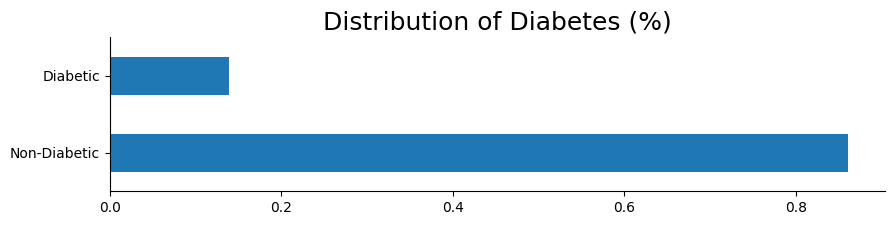

In [ ]:
train["Diabetes_binary"].value_counts(normalize=True)*100

train["Diabetes_binary"].value_counts(1).plot(kind = 'barh',figsize=(10,2)).spines[['top','right']].set_visible(False);
plt.title("Distribution of Diabetes (%)", fontsize = 18)
plt.yticks(ticks= [0,1], labels = ["Non-Diabetic","Diabetic"]);

In [ ]:
train[train["Diabetes_binary"]==1.0]['Sex'].value_counts(1)*100

0    52.087931
1    47.912069
Name: Sex, dtype: float64

In [ ]:
train[train["Diabetes_binary"]==0.0]['Sex'].value_counts(1)*100

0    56.593568
1    43.406432
Name: Sex, dtype: float64

In [ ]:
train[train["Diabetes_binary"]==1.0].Education.value_counts(1)*100

4    31.307644
6    29.423414
5    29.293272
3     6.495785
2     3.346913
1     0.132971
Name: Education, dtype: float64

In [ ]:
train[train["Diabetes_binary"]==0.0].Education.value_counts(1)*100

6    44.392994
5    27.277474
4    23.671989
3     3.289456
2     1.309920
1     0.058168
Name: Education, dtype: float64

In [ ]:
age_dist = train[train["Diabetes_binary"]==1.0].Age.value_counts(1)*100

<ipython-input-78-9053f0985037>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '>80'],rotation = 90);


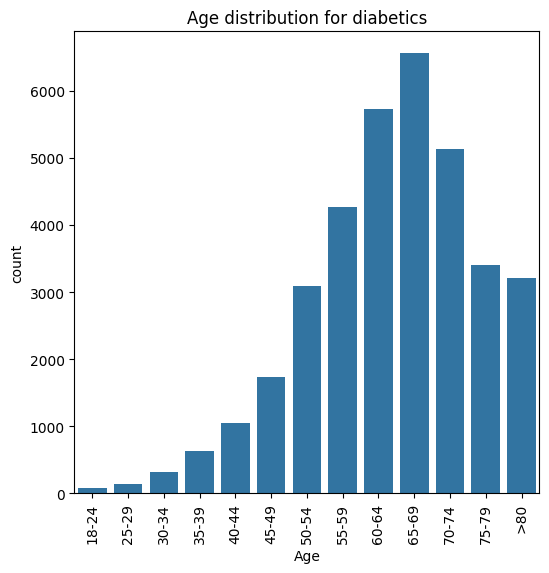

In [ ]:
ax = sns.countplot(train[train['Diabetes_binary']==1.0],x = 'Age')
ax.set(title = "Age distribution for diabetics")
ax.set_xticklabels(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '>80'],rotation = 90);

In [ ]:
age_dist.head(8).sum()

93.75035364680585

In [ ]:
age_dist2 = (train[train["Diabetes_binary"]==0.0].Age.value_counts(1)
             .to_frame()
             .reset_index()
             .rename(columns={'index': 'Age', 'Age': 'Percentage'}))

In [ ]:
age_dist2[age_dist2["Age"]>6].Percentage.sum()*100

67.81582346313446

<ipython-input-128-d0cf83520806>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '>80'],rotation = 80);


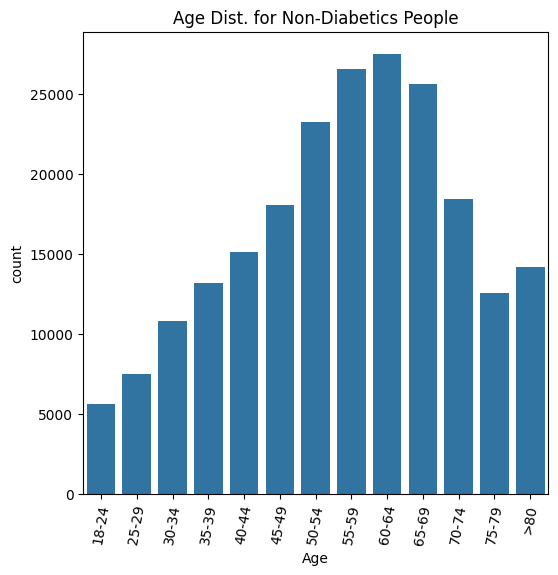

In [ ]:
ax = sns.countplot(data = train[train["Diabetes_binary"]==0.0],x = "Age")
ax.set(title ="Age Dist. for Non-Diabetics People")
ax.set_xticklabels(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '>80'],rotation = 80);


#**HIGHBP**
\

In [5]:
train[train["Diabetes_binary"]==1.0].HighBP.value_counts(1)*100

1    75.267357
0    24.732643
Name: HighBP, dtype: float64

In [6]:
train[train["Diabetes_binary"]==0.0].HighBP.value_counts(1)*100

0    62.33981
1    37.66019
Name: HighBP, dtype: float64

#**High Cholestrol**

In [8]:
train[train["Diabetes_binary"]==1.0].HighChol.value_counts(1)*100

1    67.011826
0    32.988174
Name: HighChol, dtype: float64

In [9]:
train[train["Diabetes_binary"]==0.0].HighChol.value_counts(1)*100

0    61.570346
1    38.429654
Name: HighChol, dtype: float64

#**Heart Disease or Heart Attack**

In [10]:
train[train["Diabetes_binary"]==1.0].HeartDiseaseorAttack.value_counts(1)*100

0    77.711764
1    22.288236
Name: HeartDiseaseorAttack, dtype: float64

In [11]:
train[train["Diabetes_binary"]==0.0].HeartDiseaseorAttack.value_counts(1)*100

0    92.664908
1     7.335092
Name: HeartDiseaseorAttack, dtype: float64

#**Stroke**

In [12]:
train[train['Diabetes_binary']==1.0].Stroke.value_counts(normalize=True)*100

0    90.754258
1     9.245742
Name: Stroke, dtype: float64

In [13]:
train[train['Diabetes_binary']==0.0].Stroke.value_counts(normalize=True)*100

0    96.782911
1     3.217089
Name: Stroke, dtype: float64

#**BMI**

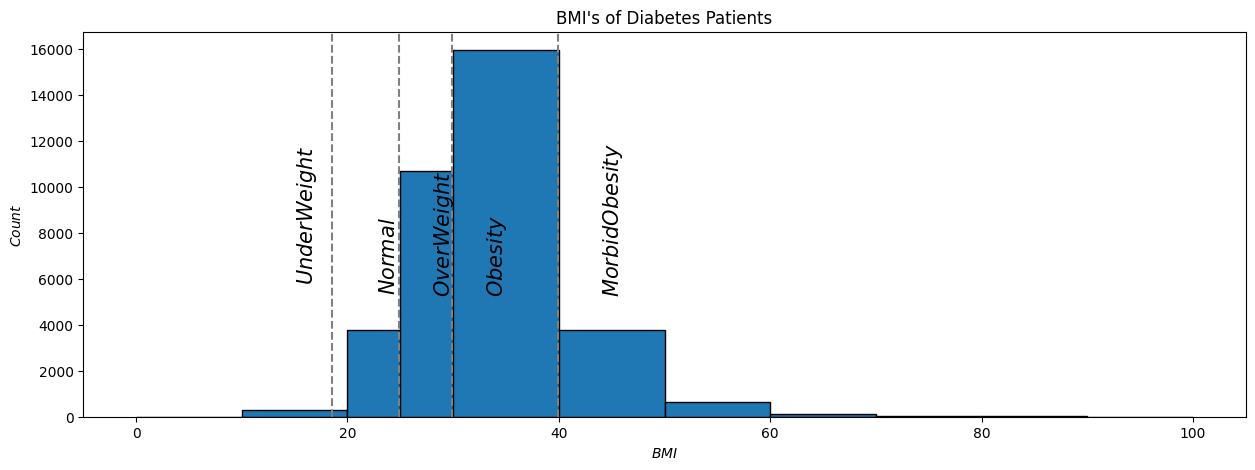

In [26]:
# plotting lines
plt.axvline(18.5 , color = 'gray',linestyle = "--")
plt.axvline(24.9,color = 'gray',linestyle = "--")
plt.axvline(29.9,color = 'gray', linestyle = "--")
plt.axvline(39.9, color = 'gray', linestyle = "--")

# add text
plt.text(15,6000,"$Under Weight$", rotation = 90, size = 15)
plt.text(23, 5500 , "$Normal$",rotation = 90 , size = 15)
plt.text(28 , 5500  , "$OverWeight$",rotation = 90, size = 15)
plt.text(33, 5500 ,"$Obesity$" , rotation = 90, size = 15)
plt.text(44, 5500 , "$Morbid Obesity$", rotation = 90, size = 15)

plt.hist(train[train["Diabetes_binary"]==1.0].BMI,edgecolor = "black",bins = [0,10,20,25,30,40,50,60,70,80,90,100])
plt.xlabel("$BMI$")
plt.ylabel("$Count$")
plt.title("BMI's of Diabetes Patients")
plt.rcParams["figure.figsize"] = (15,5)


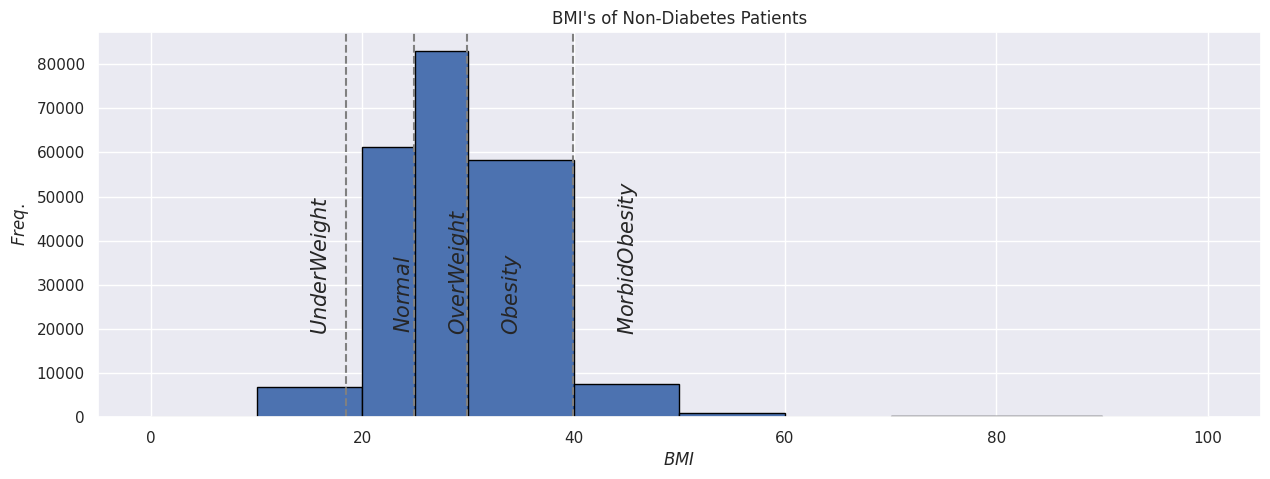

In [51]:
plt.axvline(18.5,color = "gray",linestyle = "--")
plt.axvline(24.9, color = "gray",linestyle = "--")
plt.axvline(29.9,  color = "gray",linestyle = "--")
plt.axvline(39.9, color = "gray",linestyle = "--")

# add text
plt.text(15,20000, "$UnderWeight$", rotation = 90 , size = 15)
plt.text(23,20000, "$Normal$", rotation = 90 , size = 15)
plt.text(28,20000, "$OverWeight$", rotation = 90 , size = 15)
plt.text(33,20000, "$Obesity$", rotation = 90 , size = 15)
plt.text(44,20000, "$MorbidObesity$", rotation = 90 , size = 15)

plt.hist(train[train["Diabetes_binary"]==0.0].BMI , edgecolor = 'black',bins = [0,10,20,25,30,40,50,60,70,80,90,100])
plt.xlabel("$BMI$")
plt.ylabel("$Freq.$")
plt.title("BMI's of Non-Diabetes Patients")
plt.rcParams["figure.figsize"] = (15,5)

In [32]:
train.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

#**feature_engineering**

In [34]:
# Hasn't fallen sick in the last 30 days and feels excellent or very good
train['PerfectHlth'] = (train['PhysHlth']==0.0) & (train['GenHlth']<3.0)
train['PerfectHlth'] = train['PerfectHlth'].astype(int)

In [36]:
# No single issue with heart disease or BP

train['NoHrtIssue'] = (train['HighBP']==0.0) & (train['HighChol']==0.0) & (train['HeartDiseaseorAttack']==0.0)
train['NoHrtIssue'] = train['NoHrtIssue'].astype(int)

In [37]:
# Diabetics would most likely feel unwell and in a slightly poorer state of health

train['hlthNotGood'] = train['GenHlth'] > 3
train['HlthAboveGood'] = train['GenHlth'] < 3
train['hlthNotGood'] = train['hlthNotGood'].astype(int)
train['HlthAboveGood'] = train['HlthAboveGood'].astype(int)

In [48]:
#unwell & difficulty walking because of low or excess sugar(check to confirm)
train['hlthNotGood&DiffWalk'] = (train['GenHlth'] > 3.0) & (train['DiffWalk']==1.0)
train['hlthNotGood&DiffWalk'] = train['hlthNotGood&DiffWalk'].astype(int)

In [39]:
# Type 2 diabetes being age-related: people with high blood pressure and heart disease/illness(more prevalent with aging)

train['hbp&HA'] = (train['HeartDiseaseorAttack'] == 1.0) & (train['HighBP'] == 1.0)
train['hbp&HA'] = train['hbp&HA'].astype(int)
train['hbp&HA'].value_counts()

0    235752
1     17928
Name: hbp&HA, dtype: int64

In [41]:
train['older&poor'] = (train['Age'] > 5.0) & (train['Income'] < 5)
train['older&poor'] = train['older&poor'].astype(int)
train['older&poor'].value_counts()

0    206599
1     47081
Name: older&poor, dtype: int64

#**Plotting the correlation**

#**Correlation of each feature to Diabetes(-ve correlation to diabetes implies +ve correlation to being non-diabetic)**

In [43]:
correlation = train.corr(numeric_only = True)


In [47]:
correlation["Diabetes_binary"].sort_values(ascending = False)

Diabetes_binary         1.000000
GenHlth                 0.293569
HighBP                  0.263129
hlthNotGood             0.249898
DiffWalk                0.218344
BMI                     0.216843
HighChol                0.200276
hbp&HA                  0.185759
Age                     0.177442
HeartDiseaseorAttack    0.177282
PhysHlth                0.171337
older&poor              0.166253
Stroke                  0.105816
MentHlth                0.069315
CholCheck               0.064761
Smoker                  0.060789
NoDocbcCost             0.031433
Sex                     0.031430
AnyHealthcare           0.016255
Fruits                 -0.040779
Veggies                -0.056584
HvyAlcoholConsump      -0.057056
PhysActivity           -0.118133
Education              -0.124456
Income                 -0.163919
PerfectHlth            -0.206849
NoHrtIssue             -0.234274
HlthAboveGood          -0.255507
Name: Diabetes_binary, dtype: float64

<Axes: title={'center': 'Correlation to diabetes'}>

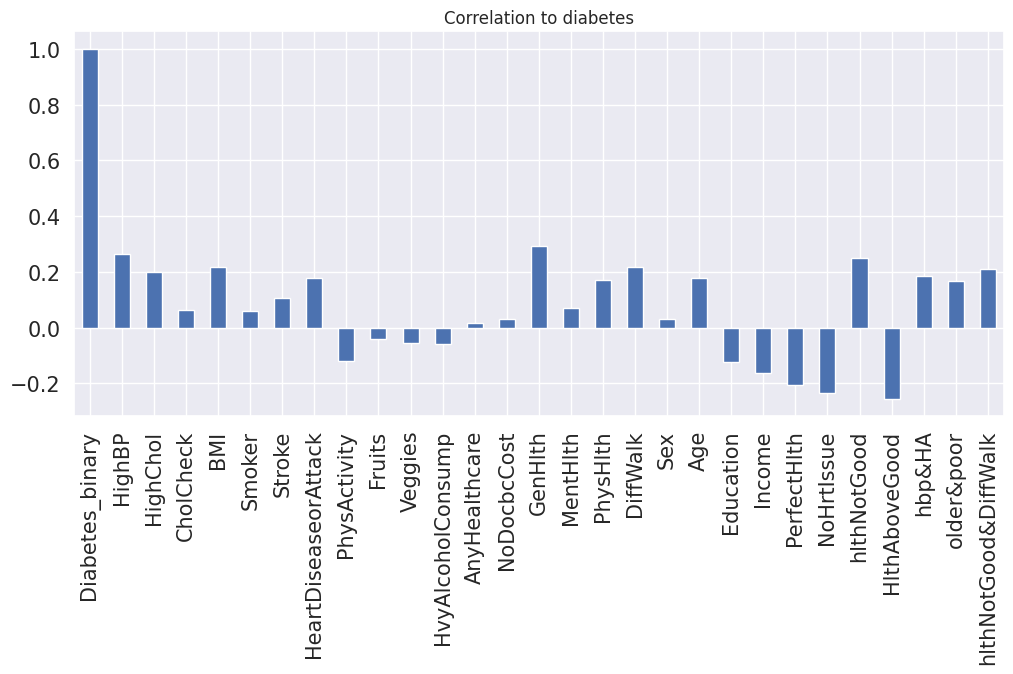

In [52]:
sns.set(color_codes = True)
train.corrwith(train.Diabetes_binary).plot(kind = "bar",figsize = (12,5), title = "Correlation to diabetes",fontsize = 15 , rot = 90, grid = True)

#**Data Preparation**

In [53]:
train2 = train.drop(['Fruits', 'Veggies', 'AnyHealthcare', 'NoDocbcCost', 'Income',
              'Education', 'CholCheck'],axis=1)

In [55]:
train3 = train2.copy()

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'PerfectHlth',
       'NoHrtIssue', 'hlthNotGood', 'HlthAboveGood', 'hbp&HA', 'older&poor',
       'hlthNotGood&DiffWalk'],
      dtype='object')

In [ ]:
# cat_features = [i for i in train3.columns if  ]

In [65]:
train3

,Diabetes_binary,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,GenHlth,...,DiffWalk,Sex,Age,PerfectHlth,NoHrtIssue,hlthNotGood,HlthAboveGood,hbp&HA,older&poor,hlthNotGood&DiffWalk
0,0,1,1,40,1,0,0,0,0,5,...,1,0,9,0,0,1,0,0,1,1
1,0,0,0,25,1,0,0,1,0,3,...,0,0,7,0,1,0,0,0,1,0
2,0,1,1,28,0,0,0,0,0,5,...,1,0,9,0,0,1,0,0,0,1
3,0,1,0,27,0,0,0,1,0,2,...,0,0,11,1,0,0,1,0,0,0
4,0,1,1,24,0,0,0,1,0,2,...,0,0,11,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,45,0,0,0,0,0,3,...,0,1,5,0,0,0,0,0,0,0
253676,1,1,1,18,0,0,0,0,0,4,...,1,0,11,0,0,1,0,0,1,1
253677,0,0,0,28,0,0,0,1,0,1,...,0,0,2,1,1,0,1,0,0,0
253678,0,1,0,23,0,0,0,0,0,3,...,0,1,7,0,0,0,0,0,1,0
